In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [43]:

tests = ["fake_1sec","fake_3sec","fake_5sec","fake_10sec","real_1sec","real_3sec","real_5sec","real_10sec"]
tests = ["real_1sec","real_3sec","real_5sec","real_10sec", "fake_1sec","fake_3sec","fake_5sec","fake_10sec"]
data = []
for test in tests:
    f = open('logs/'+test+'_clean.txt', 'r')
    lines = f.readlines()
    # Strips the newline character
    current_sample = ""
    for line in lines:
        match = re.match("sample: [0-9] ./temp/(.+).wav", line)
        if match:
            current_sample = match.groups()[0]
            # print(match.groups()[0])
        match = re.match("(^[0-9].*)", line)
        if match:
            t = re.match("(fake|real)_([0-9]+)sec", test)
            data.append([t.groups()[0], t.groups()[1], current_sample] + match.groups()[0].split(", "))
            
            # print(data[-1])
df = pd.DataFrame(data, columns=["fake", "interval", "sample", "n", "guess", "rolling_avg", "response_time"])
print(df)



     fake interval        sample   n        guess          rolling_avg  \
0    real        1  LA_E_6842509   1    0.9968088   0.9968088269233704   
1    real        1  LA_E_6842509   2   0.87955713   0.9381829798221588   
2    real        1  LA_E_6842509   3  0.004176735   0.6268475648636619   
3    real        1  LA_E_6842509   4    0.9439912   0.7061334697064012   
4    real        1  LA_E_6842509   5    0.9968823   0.7642832396551966   
..    ...      ...           ...  ..          ...                  ...   
795  fake       10  LA_E_1375436   6   0.08719488    0.262820723777016   
796  fake       10  LA_E_1375436   7  0.060329627  0.23389342427253723   
797  fake       10  LA_E_1375436   8   0.06271929  0.21249665785580873   
798  fake       10  LA_E_1375436   9   0.07368958  0.19707364920112821   
799  fake       10  LA_E_1375436  10   0.07117503   0.1844837874174118   

           response_time  
0     0.1790975989999879  
1     0.1765891229999852  
2     0.2059256989999767  
3  

In [44]:
df = df.astype({'fake': 'string', 'interval': 'int', 'sample': 'string', 'n': "int", 'guess': 'float', "rolling_avg": 'float', "response_time": "float"})
print(df.dtypes)

fake              string
interval           int64
sample            string
n                  int64
guess            float64
rolling_avg      float64
response_time    float64
dtype: object


In [45]:
df.groupby(["fake", 'interval', "sample"]).size().to_dict()
df.groupby(["sample"]).size().to_dict()

{'LA_E_1350882': 40,
 'LA_E_1375436': 40,
 'LA_E_1682845': 40,
 'LA_E_2378020': 40,
 'LA_E_2944451': 40,
 'LA_E_3294833': 40,
 'LA_E_3623417': 40,
 'LA_E_3913416': 40,
 'LA_E_4570967': 40,
 'LA_E_5130467': 40,
 'LA_E_6091662': 40,
 'LA_E_6137569': 40,
 'LA_E_6842509': 40,
 'LA_E_6916145': 40,
 'LA_E_7524749': 40,
 'LA_E_7791735': 40,
 'LA_E_7824929': 40,
 'LA_E_8620578': 40,
 'LA_E_8983191': 40,
 'LA_E_9877938': 40}

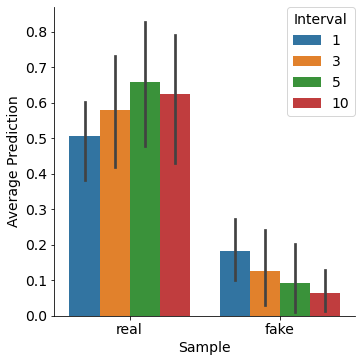

In [46]:
# d = df[df["n"] == 10].groupby(["fake","interval"])
# averages = d['rolling_avg'].mean().reset_index().sort_values(by=['fake'], ascending=False)
# print(averages)
plt.rcParams.update({'font.size': 14})
ax = sns.catplot(data=df[df["n"] == 10], x="fake", y="rolling_avg", hue="interval", kind="bar", legend=False)
ax.set_axis_labels('Sample', 'Average Prediction', size=14)
plt.legend(title='Interval', borderaxespad=0.)

# ax = sns.catplot(data=df[df["n"] == 10], x="fake", y="rolling_avg", hue="interval", kind="violin",)


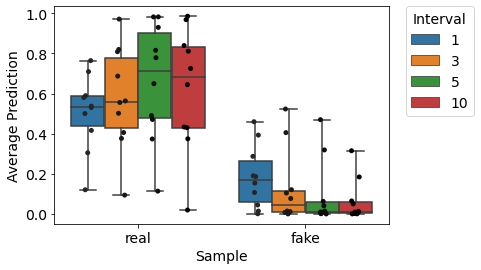

In [47]:



# fig1 = sns.violinplot(data=df[df["n"] == 10], x="fake", y="rolling_avg", hue="interval", dodge=True, cut=0.2,
#                     inner=None)

fig1 = sns.boxplot(data=df[df["n"] == 10], x="fake", y="rolling_avg", hue="interval", whis=float('inf'))
fig2 = sns.stripplot(data=df[df["n"] == 10], x="fake", y="rolling_avg", hue="interval", color="black", dodge=True)
# fig2.set_axis_labels('Sample', 'Average after 10 predictions')
fig2.set(xlabel="Sample", ylabel = 'Average Prediction')
h,l = fig2.get_legend_handles_labels()
plt.legend(h[0:4],l[0:4],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Interval')




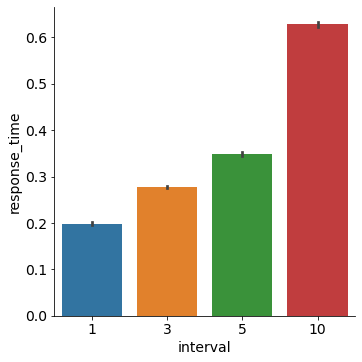

In [48]:
ax = sns.catplot(data=df, x="interval", y="response_time", kind="bar",)
ax.set_axis_labels('Interval Length (sec)', 'Response Time (sec)', size=14)

